# <font size = 10 color = brown><b>Classification

In [28]:
# basic 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.svm import SVC

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for optimal k
from sklearn.model_selection import cross_val_score

# for validation and evaluation
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

### <font size = 5 color = seagreen><b> Data import

In [2]:
credit = pd.read_csv('~/OneDrive/Emeritus/IITG-DSBA March 27th/Predictive/final datasets/germancredit.csv')
cardio = pd.read_csv('~/OneDrive/Emeritus/IITG-DSBA March 27th/Predictive/final datasets/cardiotocography.csv')

## <font size = 7 color = midnightblue><b>k Nearest Neighbors using the cardio data

### <font size = 5 color = seagreen><b>Model training and Evaluation

---

* Step 1 : train test split
* Step 2 : model object
* Step 3 : train/fit
* Step 4 : predict
* Step 5 : evaluate

---


#### <font size = 5 color = salmon><b> Train test split

In [34]:
X = cardio.drop(columns = 'NSP')
y = cardio.NSP
X_train, X_test, y_train, y_test = split(X,y, test_size=0.30, random_state=12)

#### <font size = 5 color = salmon><b>  Standardization

In [35]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### <font size = 5 color = salmon><b>  Optimal k value

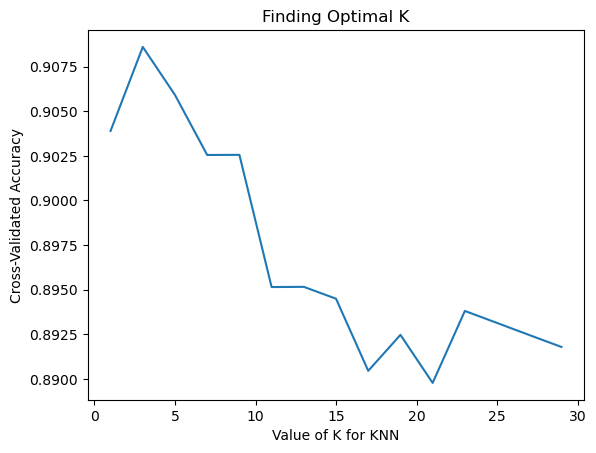

In [36]:
scores = []
for k in range(1,31,2):
    knn = KNeighborsClassifier(n_neighbors= k)
    cv_scores = cross_val_score(knn, X_train_std,y_train, cv = 5, scoring = 'accuracy')
    scores.append(cv_scores.mean())

plt.plot(range(1,31,2), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal K')
plt.show()
    

In [37]:
scores

[np.float64(0.903895781076989),
 np.float64(0.9086005468555804),
 np.float64(0.9059114636295844),
 np.float64(0.9025489797301877),
 np.float64(0.9025557589315978),
 np.float64(0.8951528709917971),
 np.float64(0.895164169660814),
 np.float64(0.8944998079226266),
 np.float64(0.8904616636160261),
 np.float64(0.892475086434818),
 np.float64(0.8897837434750187),
 np.float64(0.8938151085802092),
 np.float64(0.8931417079068085),
 np.float64(0.8924660474996046),
 np.float64(0.8917971662938106)]

In [38]:
k_range = list(range(1,31,2))

In [39]:
optimal_k = k_range[np.argmax(scores)]

#### <font size = 5 color = salmon><b>  Model Object 

In [40]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

#### <font size = 5 color = salmon><b>  Model Training 

In [41]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
cv_score = cross_val_score(knn, X_train_std,y_train, cv = 5, scoring = 'accuracy')

In [43]:
cv_score.mean()

np.float64(0.9086005468555804)

#### <font size = 5 color = salmon><b>  Prediction

In [44]:
pred_knn= knn.predict(X_test_std)

#### <font size = 5 color = salmon><b>  Evaluation

In [45]:
print(classification_report(y_true = y_test, y_pred = pred_knn))

              precision    recall  f1-score   support

           1       0.92      0.97      0.94       482
           2       0.69      0.61      0.65        96
           3       0.91      0.72      0.80        60

    accuracy                           0.89       638
   macro avg       0.84      0.77      0.80       638
weighted avg       0.89      0.89      0.89       638



 ## <font size = 7 color = midnightblue><b>Decision Tree using credit data

In [33]:
credit_t = pd.get_dummies(credit, dtype=int)

### <font size = 5 color = seagreen><b>Model training and Evaluation

---

* Step 1 : train test split
* Step 2 : model object
* Step 3 : train/fit
* Step 4 : predict
* Step 5 : evaluate

---


In [16]:
X_cr = credit_t.drop(columns = 'Default')
y_cr = credit_t.Default

In [17]:
X_train_cr, X_test_cr, y_train_cr, y_test_cr = split(X_cr, y_cr, test_size=0.20, random_state=12)

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train_cr, y_train_cr)

DecisionTreeClassifier()

In [20]:
pred_tr= dtree.predict(X_test_cr)

In [21]:
print(classification_report(y_true = y_test_cr, y_pred = pred_tr))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       130
           1       0.54      0.47      0.50        70

    accuracy                           0.68       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.67      0.68      0.67       200



### Pruning

In [22]:
pruneTree = DecisionTreeClassifier(min_samples_leaf= 21, min_samples_split= 63, max_depth= 10)

In [23]:
pruneTree.fit(X_train_cr, y_train_cr)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=21, min_samples_split=63)

In [24]:
from sklearn.tree import plot_tree

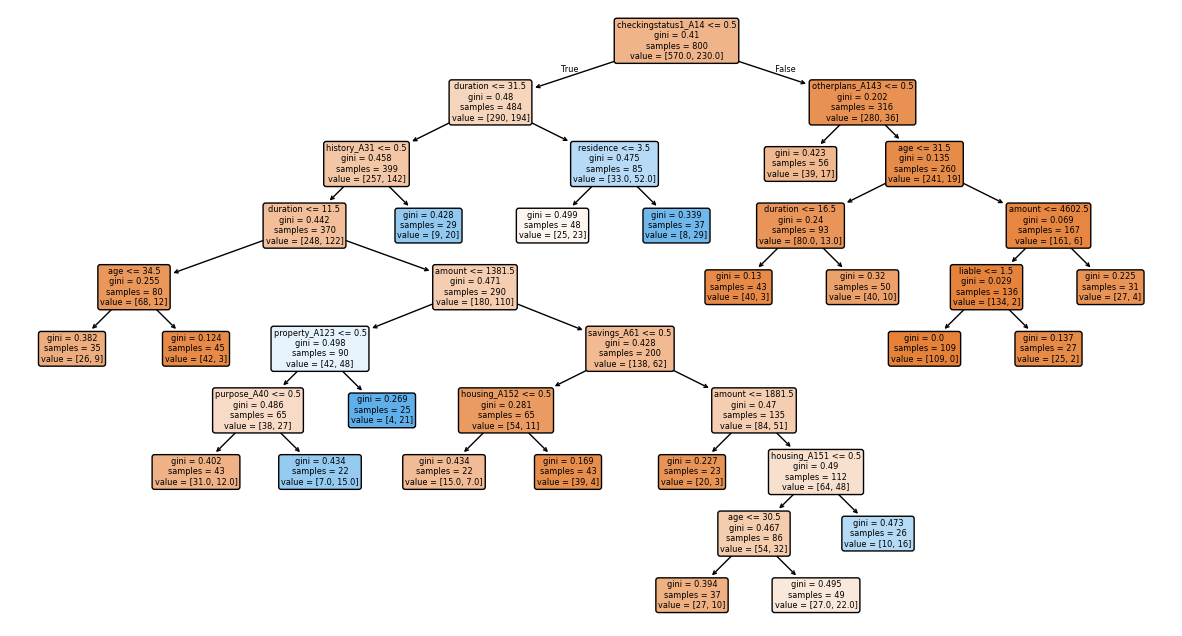

In [25]:
plt.figure(figsize = (15,8))
plot_tree(pruneTree, feature_names= X_train_cr.columns,
          filled= True, rounded = True, )
plt.show()

In [26]:
pred_ptree= pruneTree.predict(X_test_cr)
print(classification_report(y_true = y_test_cr, y_pred = pred_ptree))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78       130
           1       0.55      0.23      0.32        70

    accuracy                           0.67       200
   macro avg       0.62      0.56      0.55       200
weighted avg       0.64      0.67      0.62       200



## <font size = 7 color = midnightblue><b> Naive Bayes Classifier

### <font size = 5 color = seagreen><b>Model training and Evaluation

---

* Step 1 : train test split
* Step 2 : model object
* Step 3 : train/fit
* Step 4 : predict
* Step 5 : evaluate

---


In [30]:
X_train.head(2)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1899,139,0.00906,0.001133,0.007928,0.005663,0.0,0.000000,50,1.4,0,...,102,76,178,8,0,162,142,147,71,1
1301,136,0.00000,0.000000,0.004673,0.006542,0.0,0.000935,25,1.6,0,...,98,60,158,6,0,136,126,134,34,1


In [32]:
X_train_cr.head(2)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A11,checkingstatus1_A12,checkingstatus1_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202
56,12,6468,2,1,52,1,1,False,True,False,...,True,False,False,False,False,True,False,True,True,False
955,24,1231,4,4,57,2,1,True,False,False,...,False,False,False,False,False,True,False,True,True,False


In [46]:
X_cr = credit_t.drop(columns = 'Default')
y_cr = credit_t.Default

In [47]:
X_train_cr, X_test_cr, y_train_cr, y_test_cr = split(X_cr, y_cr, test_size=0.20, random_state=12)

### <font size = 5 color = salmon><b> Categorical NB

In [52]:
X_train_cat = X_train_cr.iloc[:, 7:]
X_test_cat = X_train_cr.iloc[:, 7:]

In [53]:
catnb = CategoricalNB()
catnb.fit(X_train_cat, y_train_cr)

CategoricalNB()

In [56]:
y_pred_nb_cat = catnb.predict(X_test_cat)

##### <b> Model Parameters

In [58]:
len(catnb.category_count_)

54

In [59]:
X_train_cat.shape

(800, 54)

In [60]:
catnb.category_count_[0]

array([[451., 119.],
       [128., 102.]])

np.float64(800.0)

In [62]:
X_train_cat.columns[0]

'checkingstatus1_A11'

In [63]:
X_train_cat.checkingstatus1_A11.value_counts()

checkingstatus1_A11
0    579
1    221
Name: count, dtype: int64

##### 451 is the rows where the default = 0 & checking status != A11
##### 119 rows are where given class = Default checking status = A11
P(data | class)

### <font size = 5 color = salmon><b> Guassian NB

In [67]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [69]:
y_pred_gnb = gnb.predict(X_test)

In [70]:
gnb.theta_  # mean

array([[ 1.31945439e+02,  3.99681394e-03,  7.78072365e-03,
         4.72743605e-03,  1.88059656e-03,  7.59140665e-07,
         4.68378866e-05,  4.23853367e+01,  1.43904518e+00,
         4.72975277e+00,  8.64919011e+00,  7.31543052e+01,
         9.12540494e+01,  1.64408355e+02,  4.16624041e+00,
         3.09462916e-01,  1.38208866e+02,  1.35061381e+02,
         1.38439045e+02,  1.67297528e+01,  3.46973572e-01],
       [ 1.41994975e+02,  3.03633322e-04,  1.05258983e-02,
         2.25677310e-03,  5.99902015e-04,  0.00000000e+00,
         9.84769447e-05,  6.17537688e+01,  6.58793970e-01,
         2.79447236e+01,  7.88693467e+00,  4.89949749e+01,
         1.14000000e+02,  1.62994975e+02,  3.26130653e+00,
         2.36180905e-01,  1.46728643e+02,  1.44944724e+02,
         1.47301508e+02,  8.31658291e+00,  4.22110553e-01],
       [ 1.31689655e+02,  4.02977414e-04,  2.83627082e-02,
         3.87882821e-03,  3.79811176e-03,  2.91361724e-05,
         1.40984785e-03,  6.39741379e+01,  1.65517241e

In [71]:
gnb.var_

array([[9.03056350e+01, 1.79863292e-05, 1.57214757e-03, 8.79202489e-06,
        9.40768006e-06, 1.47824764e-06, 1.53538871e-06, 2.40497723e+02,
        7.01869961e-01, 1.20974709e+02, 3.18969083e+01, 1.28378608e+03,
        7.34653278e+02, 3.12700256e+02, 8.00902375e+00, 3.80790021e-01,
        1.78294825e+02, 1.69856421e+02, 1.58275271e+02, 4.40337028e+02,
        3.57871687e-01],
       [6.12512325e+01, 2.03502865e-06, 2.53735089e-03, 8.58636970e-06,
        4.49517875e-06, 1.47757223e-06, 1.65332797e-06, 1.47230829e+02,
        5.44936706e-01, 4.00785891e+02, 1.25202328e+01, 1.56490952e+03,
        9.43437187e+02, 2.60587916e+02, 1.01528259e+01, 5.42210008e-01,
        1.23564558e+02, 1.13097449e+02, 1.12461859e+02, 4.19010329e+02,
        3.64537727e-01],
       [7.68174807e+01, 2.53235653e-06, 7.94519471e-03, 1.57467419e-05,
        1.91003576e-05, 1.51028579e-06, 3.44685828e-06, 1.91180367e+02,
        1.36144024e+00, 1.11802103e+03, 1.57657179e+01, 2.31676754e+03,
        1.1020